# Project : Spatio-Temporal Analysis of Urban Crime Patterns

# Project Overview

This project presents a comprehensive spatio-temporal exploratory analysis of urban crime data, focusing on how crime patterns evolve over time, distribute across geographic space, and concentrate at specific locations.

Using multi-year crime records, the analysis investigates:

- Long-term and seasonal crime trends

- Reporting behavior and delays

- Daily and weekly temporal rhythms

- Area-wise and location-level spatial clustering

- Crime-type specialization across regions and hotspots

A combination of trend analysis, normalization, spatial visualization, and hotspot detection is employed to reveal both macro-level patterns and micro-level concentrations of criminal activity. The goal is not prediction, but insight generation—to understand when, where, and what type of crimes dominate the urban landscape.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
crimedf=pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
crimedf.sample(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
890144,240309079,04/11/2024 12:00:00 AM,04/05/2024 12:00:00 AM,2300,3,Southwest,378,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,3900 S FIGUEROA ST,NaN,34.0146,-118.2872
796774,231412580,06/19/2023 12:00:00 AM,06/18/2023 12:00:00 AM,1745,14,Pacific,1441,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,2300 CLARK AV,NaN,33.9872,-118.4620
1000075,242106395,02/29/2024 12:00:00 AM,02/28/2024 12:00:00 AM,1500,21,Topanga,2115,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,8200 TOPANGA CANYON BL,NaN,34.2176,-118.6060
225082,211907839,04/21/2021 12:00:00 AM,04/17/2021 12:00:00 AM,2330,19,Mission,1905,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,13400 GLADSTONE AV,NaN,34.3155,-118.4343
279511,211015750,12/16/2021 12:00:00 AM,12/01/2021 12:00:00 AM,1100,10,West Valley,1004,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,18300 ELKWOOD ST,NaN,34.2129,-118.5332


In [4]:
crimedf.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

## Column Name Standardization:

In [5]:
crimedf.columns=crimedf.columns.str.strip().str.lower().str.replace(' ','_')

## Initial Inspection:

In [6]:
crimedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   dr_no           1004991 non-null  int64  
 1   date_rptd       1004991 non-null  object 
 2   date_occ        1004991 non-null  object 
 3   time_occ        1004991 non-null  int64  
 4   area            1004991 non-null  int64  
 5   area_name       1004991 non-null  object 
 6   rpt_dist_no     1004991 non-null  int64  
 7   part_1-2        1004991 non-null  int64  
 8   crm_cd          1004991 non-null  int64  
 9   crm_cd_desc     1004991 non-null  object 
 10  mocodes         853372 non-null   object 
 11  vict_age        1004991 non-null  int64  
 12  vict_sex        860347 non-null   object 
 13  vict_descent    860335 non-null   object 
 14  premis_cd       1004975 non-null  float64
 15  premis_desc     1004403 non-null  object 
 16  weapon_used_cd  327247 non-null   fl

In [7]:
crimedf.describe()

,dr_no,time_occ,area,rpt_dist_no,part_1-2,crm_cd,vict_age,premis_cd,weapon_used_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,lat,lon
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [8]:
crimedf.describe(include='object')

,date_rptd,date_occ,area_name,crm_cd_desc,mocodes,vict_sex,vict_descent,premis_desc,weapon_desc,status,status_desc,location,cross_street
count,1004991,1004991,1004991,1004991,853372,860347,860335,1004403,327247,1004990,1004991,1004991,154236
unique,1896,1879,21,140,310940,5,20,306,79,6,6,66566,10413
top,02/02/2023 12:00:00 AM,01/01/2020 12:00:00 AM,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,929,1164,69670,115190,42187,403879,296404,261284,174761,802862,802862,2598,2486


# Temporal Analysis (Time-Based Patterns)

## Crime Trends Over Time

In [9]:
crimedf['date_rptd']=pd.to_datetime(crimedf['date_rptd'])
crimedf['date_occ']=pd.to_datetime(crimedf['date_occ'])

Quick Sanity Check

In [10]:
crimedf[['date_rptd','date_occ']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   date_rptd  1004991 non-null  datetime64[ns]
 1   date_occ   1004991 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 15.3 MB


In [11]:
crimedf['occ_year']=crimedf['date_occ'].dt.year
crimedf['occ_month']=crimedf['date_occ'].dt.month
crimedf['occ_month_name']=crimedf['date_occ'].dt.month_name()
crimedf['occ_weekday']=crimedf['date_occ'].dt.day_name()

In [12]:
crimedf.sample()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,occ_year,occ_month,occ_month_name,occ_weekday
483534,220813792,2022-08-23,2022-08-19,1615,8,West LA,887,2,354,THEFT OF IDENTITY,...,NaN,NaN,1800 BAGLEY AV,NaN,34.0478,-118.3915,2022,8,August,Friday


## Crimes Per Year Trend

In [13]:
yearly_crimes=crimedf.groupby('occ_year').size().reset_index(name='count')

In [14]:
yearly_crimes_till_2024=yearly_crimes.head()

In [15]:
yearly_crimes_till_2024

,occ_year,count
0,2020,199847
1,2021,209876
2,2022,235259
3,2023,232345
4,2024,127567


#### I removed 2025 data completely from this analysis as it is incomplete and can hamper the trend analysis.

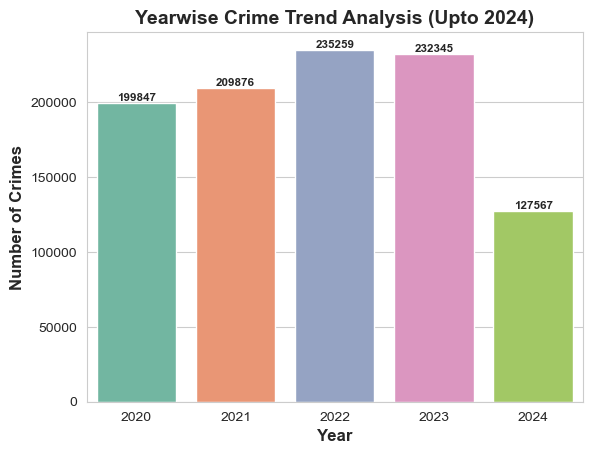

In [16]:
sns.set_style("whitegrid")
ax=sns.barplot(data=yearly_crimes_till_2024,x='occ_year',y='count',palette='Set2')
for p in ax.patches:
    ax.annotate (f'{p.get_height():.0f}',(p.get_x()+p.get_width() / 2.,p.get_height()),ha='center',va='bottom',fontsize=8.4,fontweight='bold')
plt.title('Yearwise Crime Trend Analysis (Upto 2024)',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Crimes',fontsize=12,fontweight='semibold')

plt.show()

## Insights:
- Reported crimes increased steadily from 2020 to 2022, reaching a peak in 2022.

- 2023 shows a slight decline, suggesting possible stabilization.

- There is a sharp drop in 2024.
  
- 2025 was correctly excluded to avoid misleading trend interpretation.

# Crimes Per Month (Seasonality):

In [17]:
crimedf.tail()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,occ_year,occ_month,occ_month_name,occ_weekday
1004986,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,2025,2,February,Sunday
1004987,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,2025,2,February,Tuesday
1004988,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,2025,1,January,Thursday
1004989,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025,1,January,Friday
1004990,251904210,2025-03-25,2025-03-25,1235,19,Mission,1944,2,850,INDECENT EXPOSURE,...,NaN,NaN,11100 OMELVENY AV,NaN,34.2722,-118.4417,2025,3,March,Tuesday


#### It is clearly observable that for the last month , data may be incomplete , so I remove march 2025 from the dataframe to create a new dataframe.

In [18]:
crimedf_lastmonth_removed=crimedf.iloc[:-1]

In [19]:
crime_seasonality=crimedf_lastmonth_removed.groupby('occ_month_name').size()
month_order=['January','February','March','April','May','June',
               'July','August','September','October','November','December']
crime_seasonality = crime_seasonality.reindex(month_order)

In [20]:
crime_seasonality=crime_seasonality.reset_index(name='count')

In [21]:
crime_seasonality

,occ_month_name,count
0,January,92701
1,February,86401
2,March,87817
3,April,83518
4,May,83013
5,June,81382
6,July,83962
7,August,83850
8,September,81015
9,October,84127


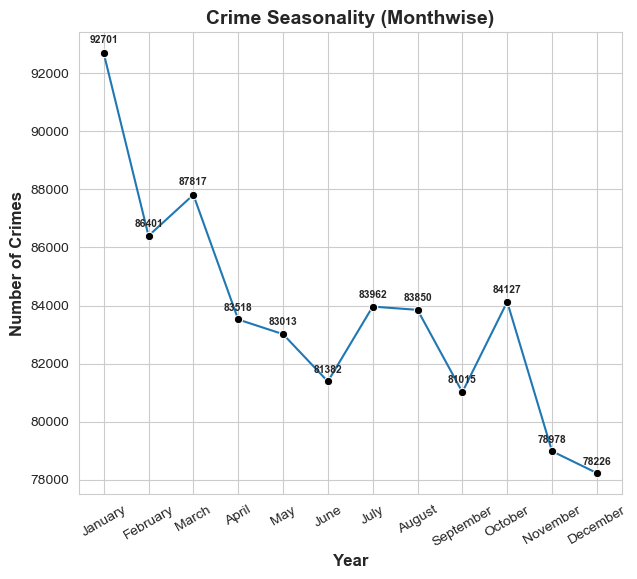

In [22]:
plt.figure(figsize=(7,6))
sns.set_style("whitegrid")
sns.lineplot(data=crime_seasonality,x='occ_month_name',y='count',marker='o',markerfacecolor='k')
plt.title('Crime Seasonality (Monthwise)',fontsize=14,fontweight='bold')
for x,y in zip(crime_seasonality['occ_month_name'],crime_seasonality['count']):
    plt.annotate(f'{y}',(x,y*1.003),ha='center',va='bottom',fontsize=7.4,fontweight='bold')
plt.xlabel('Year',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Crimes',fontsize=12,fontweight='semibold')
plt.xticks(rotation=30)
plt.show()

## Insights:
- Crime reports are highest in January, followed by a gradual decline toward mid-year.

- Mid-year months (April–September) show relatively stable and lower crime volumes.

- A secondary rise appears around October, before declining again toward year-end.

- November and December record the lowest counts, indicating a consistent year-end dip.

- March 2025 was correctly excluded to avoid bias from incomplete monthly data.

## Cumulative Crimes Across Years

In [23]:
cumulative_crimes = (
    yearly_crimes_till_2024
    .set_index('occ_year')['count']
    .cumsum()
)
years=(yearly_crimes_till_2024['occ_year'].values)
cumulative_crimes=cumulative_crimes.reindex(years)
cumulative_crimes

occ_year
2020     199847
2021     409723
2022     644982
2023     877327
2024    1004894
Name: count, dtype: int64

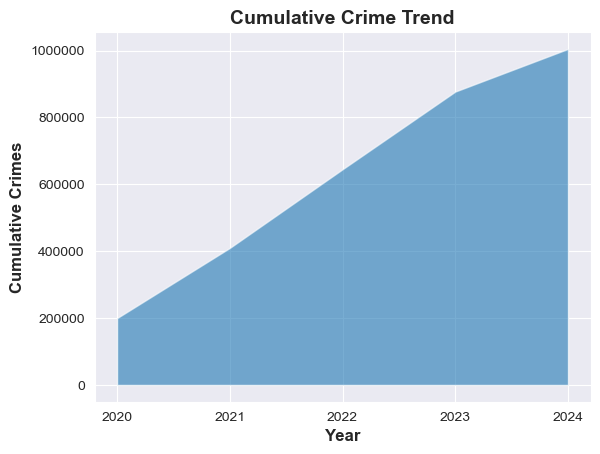

In [24]:
sns.set_style("darkgrid")
plt.fill_between(cumulative_crimes.index, cumulative_crimes.values, alpha=0.6)
plt.title('Cumulative Crime Trend',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=12,fontweight='semibold')
plt.ylabel('Cumulative Crimes',fontsize=12,fontweight='semibold')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(2020,2025))
plt.show()

## Insights:
- Cumulative crime counts increase monotonically, as expected, with no structural breaks.

- The steepest cumulative growth occurs between 2021 and 2023, indicating the period of highest annual additions.

- Growth slows in 2024.

- The cumulative curve highlights the long-term accumulation effect, crossing 1 million total crimes by 2024.

## Reporting delay (Date Reported vs Date Occurred)

In [25]:
crimedf['report_delay_days'] = (crimedf['date_rptd'] - crimedf['date_occ']).dt.days

In [26]:
crimedf.sample()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,crm_cd_4,location,cross_street,lat,lon,occ_year,occ_month,occ_month_name,occ_weekday,report_delay_days
433928,221000780,2022-07-09,2022-07-09,1445,10,West Valley,1023,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,NaN,19000 VANOWEN ST,NaN,34.1938,-118.547,2022,7,July,Saturday,0


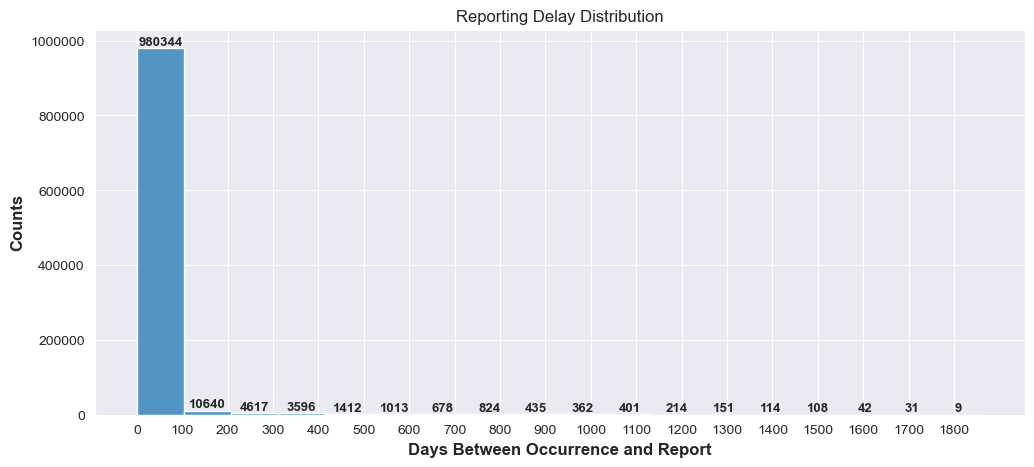

In [27]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
ax=sns.histplot(
    data=crimedf,
    x='report_delay_days',
    bins=18,
)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontweight='semibold',fontsize=9.5)
plt.title('Reporting Delay Distribution',)
plt.xlabel('Days Between Occurrence and Report',fontsize=12,fontweight='semibold')
plt.ylabel('Counts',fontsize=12,fontweight='semibold')
plt.xticks(range(0, 1900, 100))
plt.ticklabel_format(style='plain', axis='y')
plt.show()


## Insights:
- Overwhelming majority of crimes are reported quickly, with ~98% reported within the first 100 days.

- Reporting drops sharply after 100 days, indicating long delays are rare.

- A long right tail extending up to ~1800 days confirms the presence of extreme outliers.

- These extreme delays likely correspond to historical cases, reopened investigations, or administrative backlogs rather than normal reporting behavior.

## Time of Day Crime Patterns

In [28]:
crimedf['occ_hour']=crimedf['time_occ']//100

In [29]:
crimedf.sample()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,location,cross_street,lat,lon,occ_year,occ_month,occ_month_name,occ_weekday,report_delay_days,occ_hour
466664,221412234,2022-06-12,2022-06-11,940,14,Pacific,1431,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,1300 OCEAN FRONT WK,NaN,33.9885,-118.4751,2022,6,June,Saturday,1,9


In [30]:
hourly_crimes=crimedf.groupby('occ_hour').size().reset_index(name='count')

In [31]:
hourly_crimes

,occ_hour,count
0,0,40468
1,1,29761
2,2,25214
3,3,22191
4,4,18757
5,5,17290
6,6,23185
7,7,26267
8,8,37249
9,9,36524


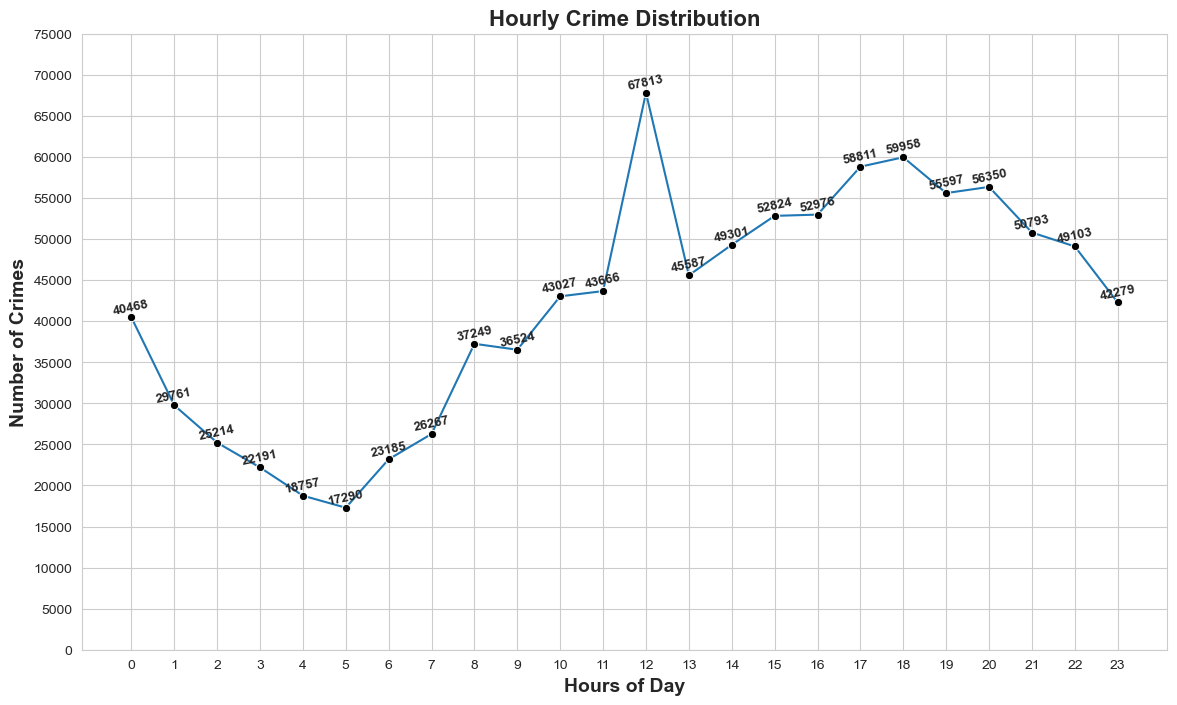

In [32]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.lineplot(data=hourly_crimes,x='occ_hour',y='count',marker='o',markerfacecolor='k')
plt.title('Hourly Crime Distribution',fontsize=16,fontweight='bold')
for x,y in zip(hourly_crimes['occ_hour'],hourly_crimes['count']):
    plt.annotate(f'{y}',(x,y*1.0019),ha='center',va='bottom',fontsize=9.4,fontweight='bold',rotation=12)
plt.xlabel('Hours of Day',fontsize=14,fontweight='semibold')
plt.ylabel('Number of Crimes',fontsize=14,fontweight='semibold')
plt.xticks(range(0,24))
plt.yticks(range(0,80000,5000))
plt.show()

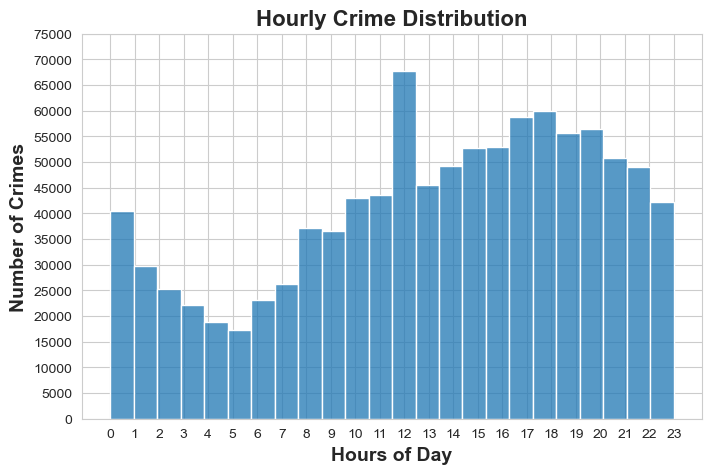

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data=crimedf,x='occ_hour', bins=24)
plt.title('Hourly Crime Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Hours of Day',fontsize=14,fontweight='semibold')
plt.ylabel('Number of Crimes',fontsize=14,fontweight='semibold')
plt.xticks(range(0,24))
plt.yticks(range(0,80000,5000))
plt.show()

## Insights:
- Crime activity is lowest during early morning hours (3–6 AM), reaching a clear trough around 4–5 AM.

- Incidents increase steadily after 6 AM, aligning with daily human activity and mobility.

- A major peak occurs around midday (12 PM), the single highest reporting hour.

- Crime levels remain consistently high from afternoon through evening (2 PM–9 PM).

- Activity declines gradually after 9 PM, but remains higher than early-morning levels.

### Creating Time Buckets

In [34]:
def time_bucket(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

crimedf['time_bucket'] = crimedf['occ_hour'].apply(time_bucket)


In [35]:
bucket_counts = crimedf['time_bucket'].value_counts().reset_index(name='count')

In [36]:
bucket_counts

,time_bucket,count
0,Afternoon,327312
1,Evening,314080
2,Morning,209918
3,Late Night,153681


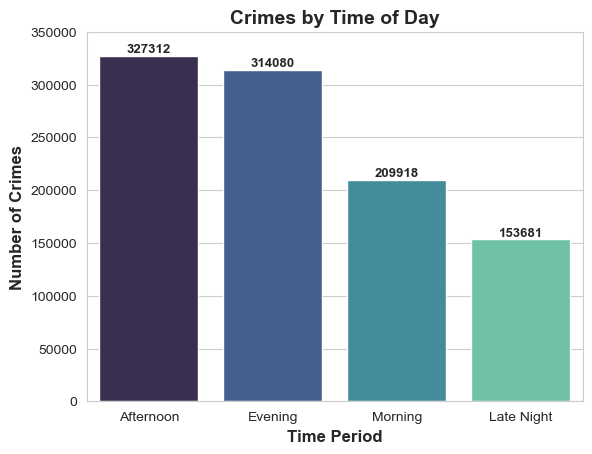

In [37]:
ax=sns.barplot(data=bucket_counts,x='time_bucket',y='count',palette='mako')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontweight='semibold',fontsize=9.5)
plt.yticks(range(0,400000,50000))
plt.title('Crimes by Time of Day',fontsize=14,fontweight='bold')
plt.xlabel('Time Period',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Crimes',fontsize=12,fontweight='semibold')
plt.show()

## Insights:
- Crime is most frequent in the afternoon and evening, while late-night incidents are comparatively fewer.

## Crime Counts by Weekday

In [38]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday',
                 'Friday','Saturday','Sunday']

weekday_crimes = crimedf['occ_weekday'].value_counts().reindex(weekday_order)


In [39]:
weekday_crimes=weekday_crimes.reset_index(name='count')

In [40]:
weekday_crimes

,occ_weekday,count
0,Monday,141543
1,Tuesday,138141
2,Wednesday,142714
3,Thursday,141810
4,Friday,153676
5,Saturday,147459
6,Sunday,139648


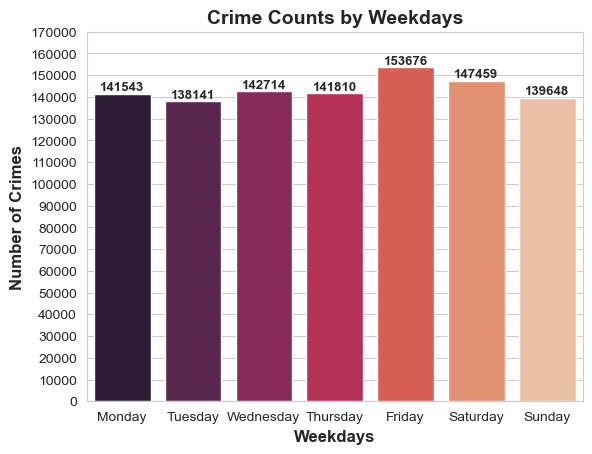

In [41]:
ax=sns.barplot(data=weekday_crimes,x='occ_weekday',y='count',palette='rocket')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontweight='semibold',fontsize=9.5)
plt.yticks(range(0,180000,10000))
plt.title('Crime Counts by Weekdays',fontsize=14,fontweight='bold')
plt.xlabel('Weekdays',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Crimes',fontsize=12,fontweight='semibold')
plt.show()

## Insights:
- Crime levels are relatively uniform across the week, with a mild increase on Fridays and Saturdays.

## Temporal Interaction: Weekday and Hour of Crime

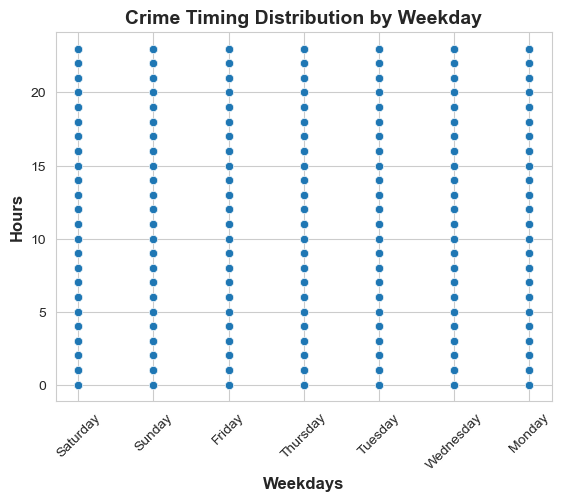

In [42]:
sns.scatterplot(x='occ_weekday', y='occ_hour', data=crimedf)
plt.xticks(rotation=45)
plt.title('Crime Timing Distribution by Weekday',fontsize=14,fontweight='bold')
plt.xlabel('Weekdays',fontsize=12,fontweight='semibold')
plt.ylabel('Hours',fontsize=12,fontweight='semibold')
plt.show()

## Insights:
- Crime timing shows a uniform spread across weekdays, indicating stable day–hour patterns rather than weekday-driven concentration.

# Geographic & Spatial Analysis

In [43]:
crimedf.sample()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,cross_street,lat,lon,occ_year,occ_month,occ_month_name,occ_weekday,report_delay_days,occ_hour,time_bucket
968030,241507388,2024-03-10,2024-03-10,1750,15,N Hollywood,1549,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,34.172,-118.3789,2024,3,March,Sunday,0,17,Afternoon


## Top Crime Counts by Area Names

In [44]:
crimedf['area_name'].value_counts()

area_name
Central        69670
77th Street    61758
Pacific        59514
Southwest      57441
Hollywood      52429
N Hollywood    51107
Olympic        50071
Southeast      49936
Newton         49177
Wilshire       48239
Rampart        46825
West LA        45729
Northeast      42963
Van Nuys       42883
West Valley    42156
Devonshire     41756
Harbor         41394
Topanga        41374
Mission        40351
Hollenbeck     37085
Foothill       33133
Name: count, dtype: int64

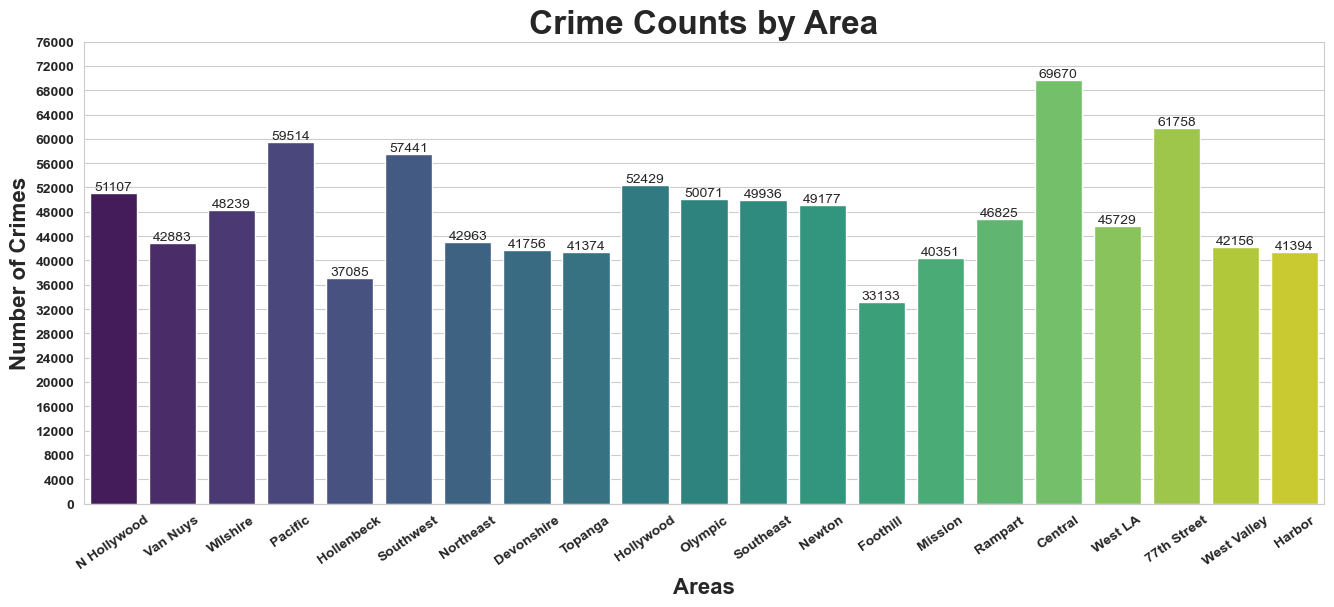

In [45]:
plt.figure(figsize=(16,6))
fig=sns.countplot(data=crimedf, x='area_name',palette='viridis')

for p in fig.patches:
    fig.annotate(f'{p.get_height():.0f}',
                 (p.get_x()+p.get_width()/2.,p.get_height()),
                 ha='center',va='bottom')
plt.title('Crime Counts by Area',fontsize=24,fontweight='bold')
plt.xlabel('Areas',fontsize=16,fontweight='semibold')
plt.ylabel('Number of Crimes',fontsize=16,fontweight='semibold')
plt.xticks(rotation=35,fontweight='semibold')
plt.yticks(range(0,78000,4000),fontweight='semibold')
plt.show()

## Insights:
- Crime incidents are highly concentrated in central and west-adjacent divisions, with Central and 77th Street alone accounting for the highest volumes, indicating a clear spatial clustering of crime around core urban areas rather than a uniform citywide distribution.

## Crime Types by Area

In [46]:
area_crime_counts = crimedf['area_name'].value_counts()

In [47]:
top_areas=area_crime_counts.head().index

In [48]:
top_crimedf=crimedf[crimedf['area_name'].isin(top_areas)]

In [49]:
area_crime_type=top_crimedf.groupby(['area_name','crm_cd_desc']).size().unstack(fill_value=0)

In [50]:
area_crime_type

crm_cd_desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
area_name,,,,,,,,,,,,,,,,,,,,,
77th Street,203,82,5921,483,4707,7,281,179,0,0,...,10,3399,1741,281,8767,4,231,672,18,2
Central,232,157,4048,457,6806,47,329,394,2,1,...,12,4808,1686,145,5050,209,142,282,11,3
Hollywood,128,55,2736,289,4482,19,200,285,1,0,...,31,3521,1151,75,3995,114,212,422,22,6
Pacific,126,35,2023,168,3340,22,152,237,0,2,...,21,3397,1311,359,6522,777,273,358,11,3
Southwest,111,88,3636,325,4528,10,152,253,0,0,...,11,3289,1592,323,6652,867,380,817,49,3


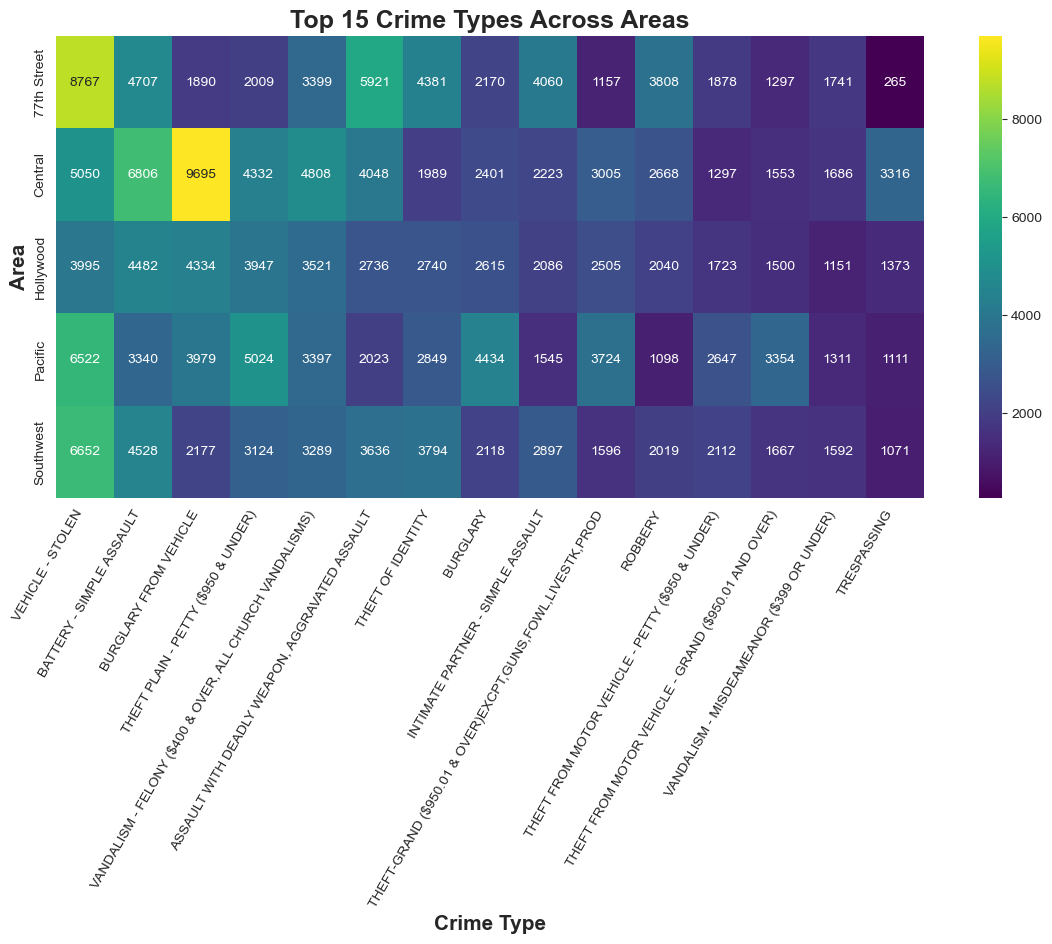

In [51]:
top_crimes = area_crime_type.sum().sort_values(ascending=False).head(15).index

plt.figure(figsize=(14,6))
sns.heatmap(
    area_crime_type[top_crimes],
    cmap='viridis',
    annot=True,
    fmt='.0f'
)
plt.title('Top 15 Crime Types Across Areas', fontsize=18, fontweight='bold')
plt.xlabel('Crime Type',fontsize=15,fontweight='semibold')
plt.ylabel('Area',fontsize=15,fontweight='semibold')
plt.xticks(rotation=60, ha='right')
plt.show()


## Insights:
- The heatmap shows clear area-wise dominance of specific crime types: 77th Street is led by vehicle theft and aggravated assault, Central by burglary from vehicles and simple assault, Pacific and Southwest by vehicle theft combined with property or assault crimes, while Hollywood exhibits a relatively balanced, moderate distribution across major crime categories.

## Normalize by total crimes (percentage view)

In [53]:
top_crimes_pct=area_crime_type[top_crimes].div(area_crime_type[top_crimes].sum(axis=1), axis=0)

In [54]:
top_crimes_pct

crm_cd_desc,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,BURGLARY FROM VEHICLE,THEFT PLAIN - PETTY ($950 & UNDER),"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",THEFT OF IDENTITY,BURGLARY,INTIMATE PARTNER - SIMPLE ASSAULT,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",ROBBERY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),VANDALISM - MISDEAMEANOR ($399 OR UNDER),TRESPASSING
area_name,,,,,,,,,,,,,,,
77th Street,0.184763,0.099199,0.039831,0.042339,0.071633,0.124784,0.092329,0.045732,0.085564,0.024384,0.080253,0.039579,0.027334,0.036691,0.005585
Central,0.092024,0.124023,0.176668,0.078940,0.087614,0.073765,0.036245,0.043752,0.040509,0.054759,0.048618,0.023635,0.028300,0.030723,0.060426
Hollywood,0.098042,0.109993,0.106361,0.096864,0.086409,0.067144,0.067243,0.064175,0.051193,0.061475,0.050064,0.042284,0.036812,0.028247,0.033695
Pacific,0.140688,0.072048,0.085832,0.108374,0.073278,0.043639,0.061456,0.095647,0.033328,0.080331,0.023685,0.057099,0.072350,0.028280,0.023966
Southwest,0.157362,0.107116,0.051500,0.073902,0.077806,0.086014,0.089752,0.050104,0.068532,0.037755,0.047762,0.049962,0.039435,0.037661,0.025336


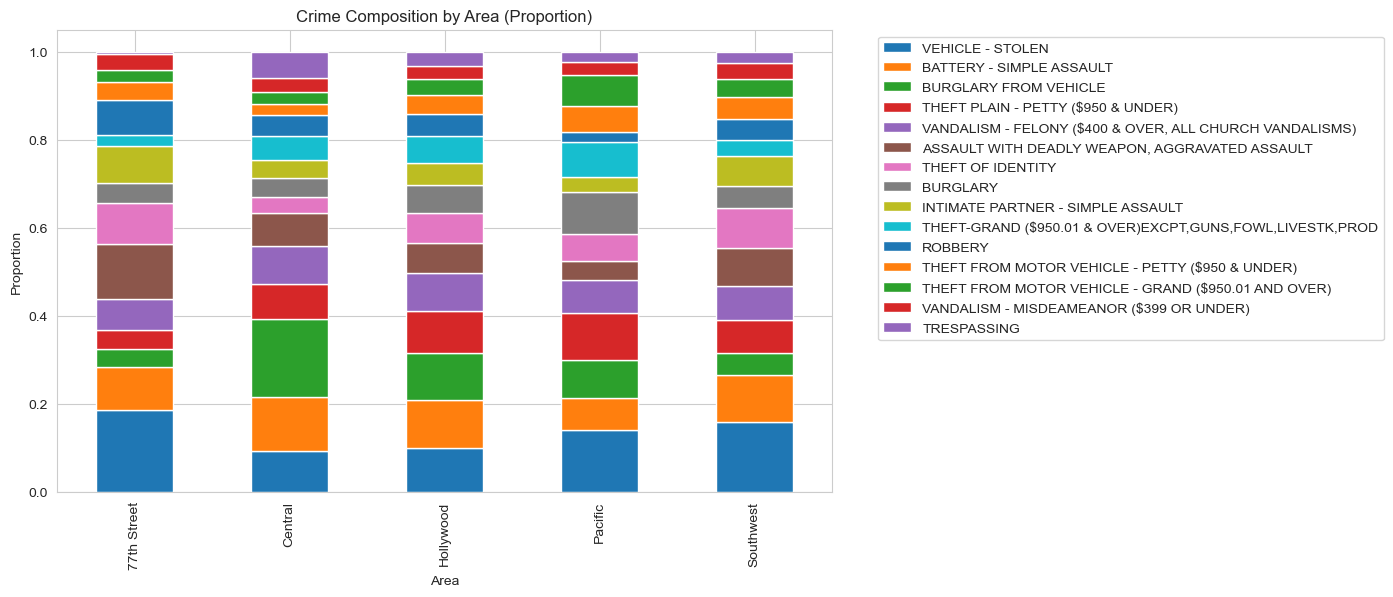

In [55]:
top_crimes_pct.plot(kind='bar',stacked='True',figsize=(10,6))
plt.title('Crime Composition by Area (Proportion)')
plt.xlabel('Area')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Insights:
- Normalization by area reveals that high-crime divisions share similar internal crime structures, with vehicle-related and assault offenses constituting the largest proportions, reinforcing the spatial specialization observed in the heatmap.

## latitude- Longitude Spatial Patterns:

In [56]:
geo_df=crimedf.dropna(subset=['lat','lon'])

In [57]:
geo_df=geo_df[(geo_df['lat']!=0) & (geo_df['lon']!=0)]

This Removes -
- Missing Values
- Invalid (0,0) values

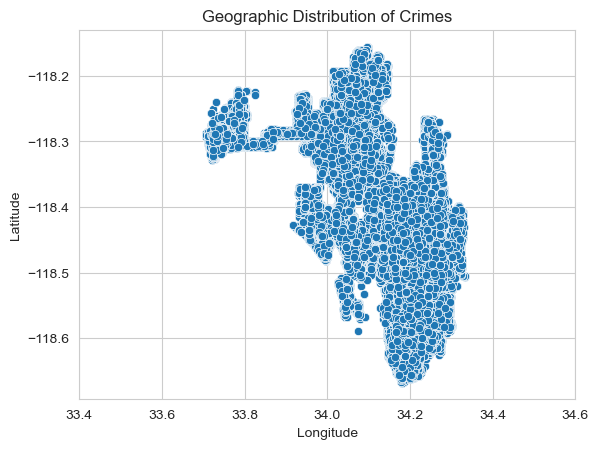

In [58]:
sns.scatterplot(data=geo_df,x='lat',y='lon')
plt.xticks(np.arange(33.4,34.6,0.2))
plt.title('Geographic Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Insights:
Crime incidents are tightly clustered within a central geographic region with significant spatial overlap and little peripheral dispersion.

## Lattitude Longitude Scatter Plot in Top 5 Crime Areas:

In [59]:
geo_top5 = geo_df[geo_df['area_name'].isin(top_areas)]


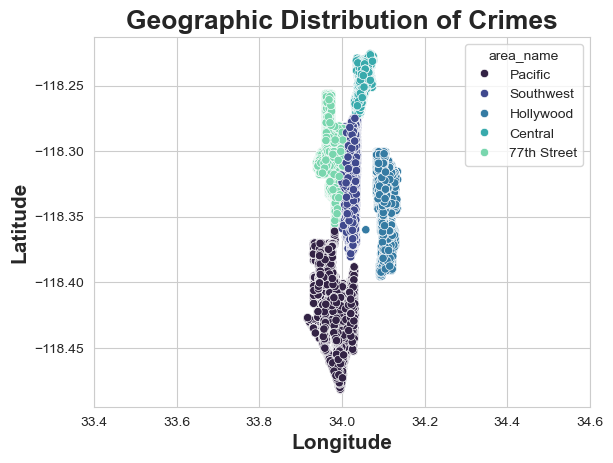

In [60]:
sns.scatterplot(data=geo_top5,x='lat',y='lon',hue='area_name',palette='mako')
plt.xticks(np.arange(33.4,34.6,0.2))
plt.title('Geographic Distribution of Crimes',fontsize=19,fontweight='bold')
plt.xlabel('Longitude',fontsize=15,fontweight='semibold')
plt.ylabel('Latitude',fontsize=15,fontweight='semibold')
plt.show()

## Insights:
- The hue-based scatterplot of the top five areas reveals extensive geographic overlap, suggesting that high-crime divisions are spatially interwoven and influenced by shared urban environments rather than separate territorial patterns.

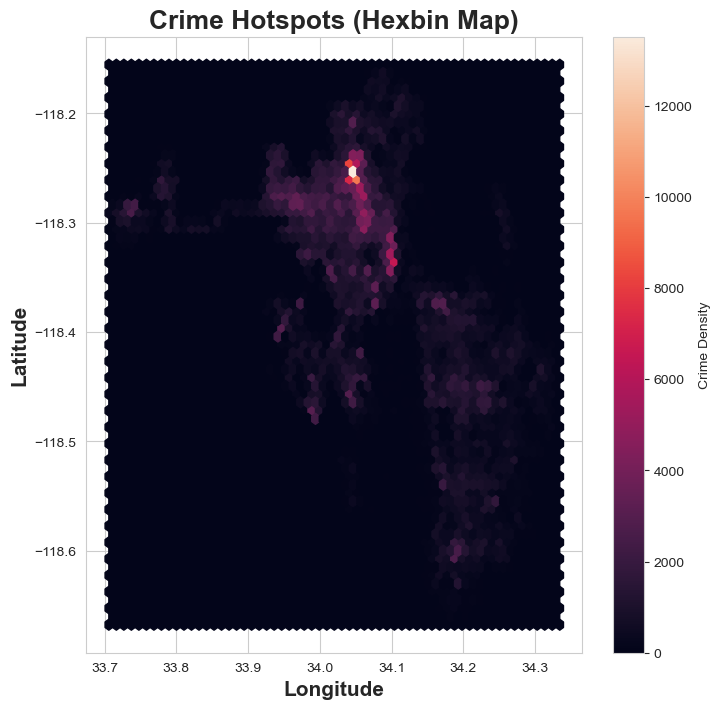

In [61]:
plt.figure(figsize=(8,8))
plt.hexbin(geo_df['lat'], geo_df['lon'], gridsize=60)
plt.colorbar(label='Crime Density')
plt.title('Crime Hotspots (Hexbin Map)',fontsize=19,fontweight='bold')
plt.xlabel('Longitude',fontsize=15,fontweight='semibold')
plt.ylabel('Latitude',fontsize=15,fontweight='semibold')
plt.show()


## Insights:
The hexbin plot highlights clear spatial hotspots within the central region, confirming that crime incidents are densely concentrated in specific geographic zones rather than uniformly distributed across space.

## Top 10 Crime Locations

In [62]:
crimedf['location'] = (
    crimedf['location']
    .str.upper()
    .str.strip()
)

In [63]:
top_locations = crimedf['location'].value_counts().head(10)

In [64]:
top_locations=top_locations.reset_index(name='count')

In [65]:
top_locations

,location,count
0,800 N ALAMEDA ST,2598
1,700 S FIGUEROA ST,1711
2,100 THE GROVE DR,1688
3,10200 SANTA MONICA BL,1657
4,6TH ST,1585
5,11800 SANTA MONICA BL,1526
6,7TH ST,1502
7,9300 TAMPA AV,1452
8,7TH,1447
9,6TH,1372


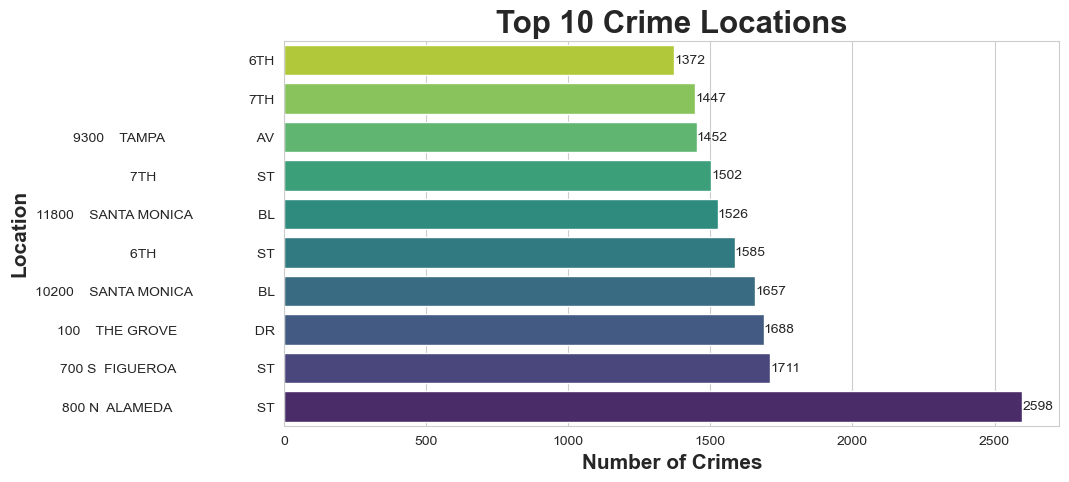

In [66]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=top_locations,x='count',y='location',palette='viridis')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        fontsize=10
    )
plt.title('Top 10 Crime Locations')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.title('Top 10 Crime Locations',fontsize=22.5,fontweight='bold')
plt.xlabel('Number of Crimes',fontsize=15,fontweight='semibold')
plt.ylabel('Location',fontsize=15,fontweight='semibold')
plt.gca().invert_yaxis()
plt.show()


## Insights:
- The highest crime concentrations occur at 800 N Alameda St and 700 S Figueroa St, with additional clustering along Santa Monica Blvd and nearby downtown streets, reflecting localized spatial hotspots within the urban core.

## Location vs Crime Type Investigation

In [67]:
location_crime=crimedf[crimedf['location'].isin(top_locations['location'])].groupby(['location','crm_cd_desc']).size().unstack(fill_value=0)

In [68]:
location_crime

crm_cd_desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIKE - STOLEN,...,TILL TAP - PETTY ($950 & UNDER),TRESPASSING,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER
location,,,,,,,,,,,,,,,,,,,,,
100 THE GROVE DR,1,0,4,2,50,0,1,12,0,4,...,0,13,51,13,0,13,2,0,0,0
10200 SANTA MONICA BL,1,0,10,2,79,0,0,2,0,11,...,2,19,52,8,0,15,14,0,2,0
11800 SANTA MONICA BL,0,0,6,2,9,0,0,1,0,1,...,0,3,5,2,0,2,5,0,0,0
6TH,2,8,277,31,218,4,13,15,0,7,...,0,2,59,18,2,60,1,1,2,0
6TH ST,5,7,240,30,240,1,4,11,1,7,...,0,2,66,25,3,187,6,0,8,0
700 S FIGUEROA ST,0,0,17,2,56,1,1,10,0,26,...,0,12,33,5,0,25,6,0,1,0
7TH,2,11,220,33,249,2,8,12,0,18,...,0,15,65,29,1,63,7,1,4,0
7TH ST,5,4,222,26,227,2,2,14,0,16,...,0,19,72,25,4,184,6,1,5,0
800 N ALAMEDA ST,7,4,68,10,428,1,50,30,0,39,...,1,1017,68,27,0,18,7,0,2,0


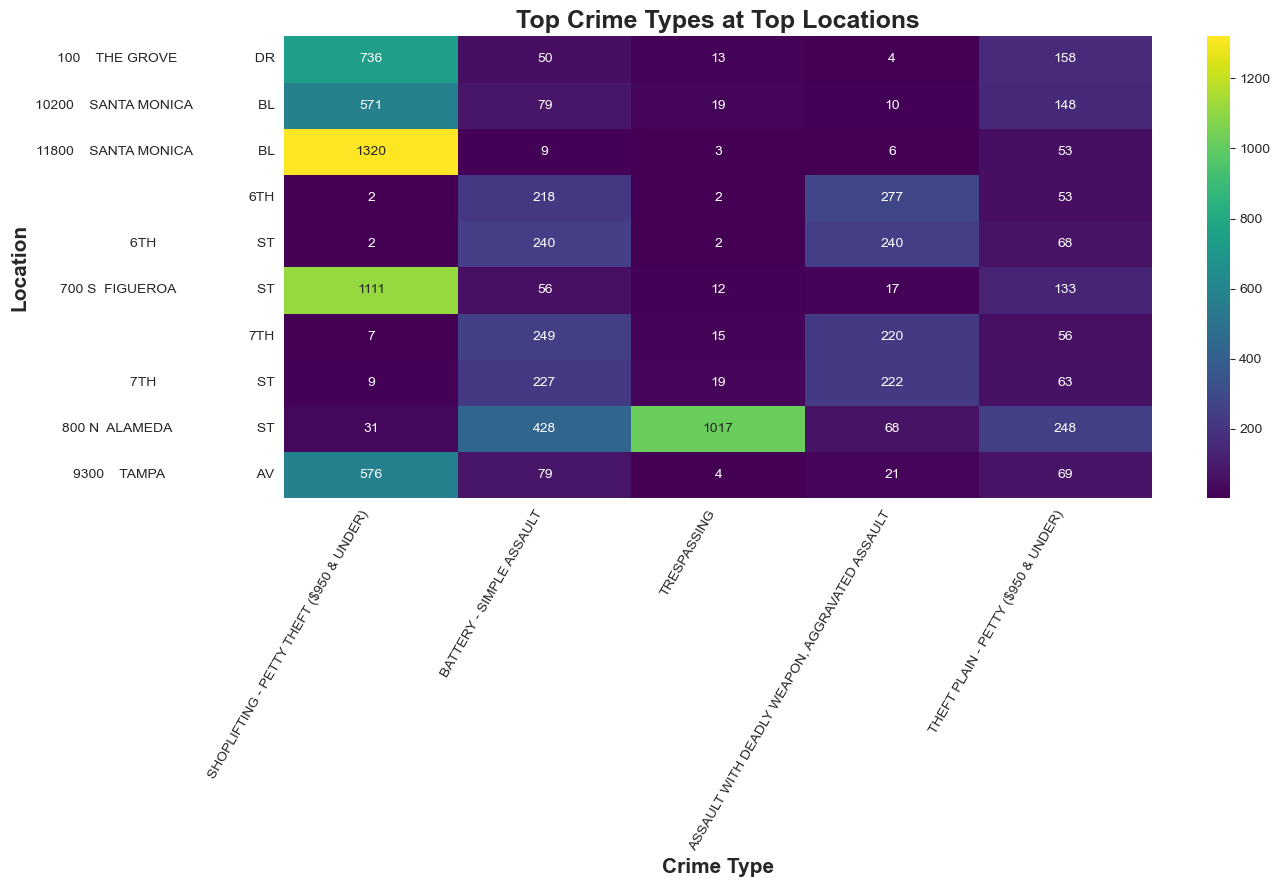

In [69]:
locationwise_top_crimes = location_crime.sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(14,6))
sns.heatmap(
    location_crime[locationwise_top_crimes],
    cmap='viridis',
    annot=True,
    fmt='.0f'
)
plt.title('Top Crime Types at Top Locations', fontsize=18, fontweight='bold')
plt.xlabel('Crime Type',fontsize=15,fontweight='semibold')
plt.ylabel('Location',fontsize=15,fontweight='semibold')
plt.xticks(rotation=60, ha='right')
plt.show()


## Insights:
- The heatmap shows that crime at top locations is highly type-specific, with retail and commercial sites such as The Grove and Santa Monica Blvd dominated by petty theft and shoplifting, while downtown corridors (6th–7th Streets) and 800 N Alameda St exhibit higher concentrations of assault and trespassing-related offenses, indicating functional differences in location-based crime patterns.

# Key Findings
## Temporal Crime Patterns

- Reported crimes increased steadily from 2020 to 2022, peaking in 2022, followed by stabilization in 2023 and a sharp decline in 2024.

- Monthly seasonality shows highest crime volumes in January, a stable mid-year period, and a consistent year-end dip in November–December.

- Cumulative crime counts crossed 1 million incidents by 2024, with the steepest growth occurring between 2021 and 2023.

- Nearly 98% of crimes are reported within 100 days, with extreme reporting delays forming a long right tail, likely due to reopened or historical cases.

- Crime activity follows a strong daily rhythm: lowest during early morning (4–5 AM), peaking around midday, and remaining elevated through the evening.

- Crime levels are relatively uniform across weekdays, with a mild Friday–Saturday increase, and stable weekday–hour interaction patterns.

## Spatial Crime Distribution

- Crime incidents are highly concentrated in central urban regions, with minimal dispersion into peripheral areas.

-Central, 77th Street, Pacific, Southwest, and Hollywood divisions account for a disproportionately large share of total crime.

- Area-wise heatmaps reveal distinct crime-type dominance:

    - 77th Street: Vehicle theft and aggravated assault

    - Central: Burglary from vehicles and simple assault

    - Pacific & Southwest: Vehicle theft combined with property and assault crimes

    - Hollywood: Moderately balanced distribution across crime types

- Percentage normalization confirms that high-crime areas share similar internal crime compositions, reinforcing spatial specialization rather than randomness.

## Hotspots & Location-Level Insights

- Latitude–longitude scatterplots and hexbin visualizations reveal clear crime hotspots, tightly clustered within the urban core.

- Top crime locations such as 800 N Alameda St and 700 S Figueroa St dominate incident counts, with additional clustering along Santa Monica Blvd and downtown corridors.

- Location-based heatmaps show functional crime specialization:

- Retail and commercial zones (e.g., The Grove, Santa Monica Blvd) are dominated by petty theft and shoplifting.

- Downtown streets (6th–7th St) and 800 N Alameda St show higher levels of assault and trespassing, indicating different crime dynamics by land use.


# Overall Conclusion

This analysis demonstrates that urban crime is neither temporally random nor spatially uniform. Instead, it follows predictable daily, seasonal, and long-term temporal rhythms, while simultaneously clustering into specific geographic regions and micro-locations.

High-crime areas are not isolated zones but spatially interwoven regions shaped by shared urban environments. Moreover, crime types vary systematically by location function—retail, transit corridors, and dense downtown streets exhibit distinct criminal profiles.

By integrating temporal trends, spatial clustering, and location-level specialization, this project highlights the importance of context-aware crime analysis and provides a strong foundation for data-informed urban safety strategies and future predictive modeling.